# Computing Trajectories: 1st-Order Systems (Velocity Field)
In this notebook, we will look at some basic numerical methods for calculating trajectories of particles determined by a velocity field. We will implement the methods manually by ourselves. 

Some terminology. 
- <b>first-order:</b> up to first-order derivatives only.
- <b>second-order:</b> up to second-order derivatives only.
- <b>ordinary:</b> total derivatives only.
- <b>partial:</b> partial derivatives included.
- <b>linear:</b> unknown function(s) $y(t)$ and its derivatives appear only once in each term in the form $a(t)y^{(n)}(t)$; no products between $y(t)$ and its derivatives (e.g. $y(t)^{2}$ or $y(t)y'(t)$); $y(t)$ is not in the argument of some nonlinear function (e.g. $e^{y(t)}$). 
- <b>non-linear:</b> not linear. 
- <b>homogeneous:</b> there is no term that does not involve the unknown function $y(t)$ (we call such a term the "constant term" even though it may depend on $t$).
- <b>non-homogeneous:</b> there is a nonzero so-called "constant term."

The systems we will examine here are given by the equation
$$ \dot{\vec{x}}(t) = \vec{v}(\vec{x}(t)) $$
with initial condition $\vec{x}(0) = \vec{x}_{0}$. The example we will use will have 
$$ \vec{v}(x, y) = \vec{e}_{1} + \cos\left(\frac{30}{1+x^{2}}\right)\vec{e}_{2}. $$ 
Below we plot the quiver representation of this velocity field. 

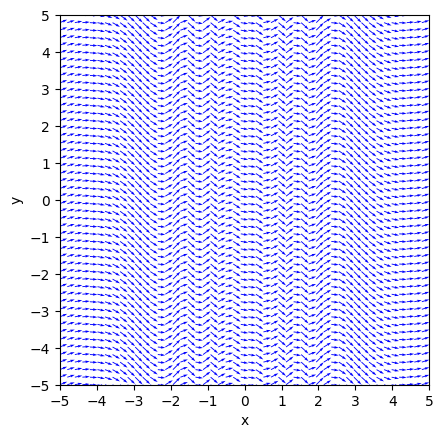

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define velocity field
def vel1(x, y):
    return 1, np.cos(30.0/(1 + x**2))

# plot the velocity field
coords = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(coords, coords)
Vx, Vy = vel1(X, Y)

plt.quiver(X, Y, Vx, Vy, units='xy', scale=5, color='blue')
plt.xlim(-5, 5), plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 6, 1)), plt.yticks(np.arange(-5, 6, 1))
plt.xlabel("x"), plt.ylabel("y")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.show()

## Method 1: Euler 

This is the simplest and most obvious one to use. Given the system of equations
\begin{align}
    \dot{x}(t) &= v_{x}(x(t), y(t)), \\ \dot{y}(t) &= v_{y}(x(t), y(t)),
\end{align}
we discretize this with a finite nonzero step $\Delta t$ to obtain
\begin{equation}
    \boxed{
        \begin{aligned}
            x_{n+1} &= x_{n} + v_{x}(x_{n}, y_{n})\Delta t, \\
            y_{n+1} &= y_{n} + v_{y}(x_{n}, y_{n})\Delta t
        \end{aligned}
    }
\end{equation}
tion}
with initial conditions $x_{0} = x(0)$ and $y_{0} = y(0)$.

The local error here is $O(\Delta  t^{2})$. 

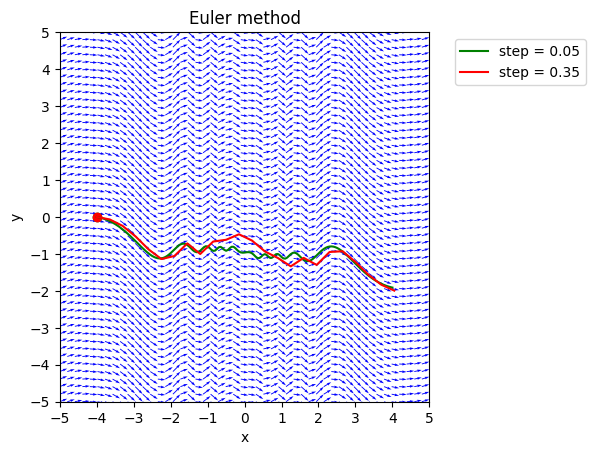

In [2]:
# Euler
# step and initial conditions
totaltime = 8
dt1, dt2 = 0.05, 0.35
x1, y1 = np.array([-4.0]), np.array([0.0])
x2, y2 = np.array([-4.0]), np.array([0.0])

# update rule
def Euler_update(x, y, dt):
    vx, vy = vel1(x[-1], y[-1])
    newx, newy = x[-1] + vx*dt, y[-1] + vy*dt
    return np.append(x, newx), np.append(y, newy)

# create tajectory; should take `totaltime` seconds
for i in range(0, round(totaltime/dt1)):
    x1, y1 = Euler_update(x1, y1, dt1)
    
for i in range(0, round(totaltime/dt2)):
    x2, y2 = Euler_update(x2, y2, dt2)

# plot trajectory with quiver
plt.quiver(X, Y, Vx, Vy, units='xy', scale=5, color='blue')
plt.xlim(-5, 5), plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 6, 1)), plt.yticks(np.arange(-5, 6, 1))
plt.xlabel("x"), plt.ylabel("y")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(x1, y1, color='green', label="step = {}".format(dt1))
plt.plot(x2, y2, color='red', label="step = {}".format(dt2))
plt.scatter([x1[0]], [y1[0]], color='green')
plt.scatter([x2[0]], [y2[0]], color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Euler method")
plt.show()

## Method 2: Midpoint AKA Runge-Kutta 2nd-Order (RK2)

In Euler's method, if we are using too large of a time-step or the velocity field is too tricky to integrate, our trajectory may deviate away from the true solution. Here we provide a way to adjust for this without directly decreasing the time-step $\Delta t$ (which could require more computational time and memory).  

<img src="midpt_img.png" alt="Drawing" style="width: 600px;"/>

As you can see in the image, what we will do is, instead of updating $\vec{x}_{n}$ by adding $\vec{v}_{n}\Delta t$, we will take the midpoint $\vec{x}_{n}+\tfrac{1}{2}\vec{v}_{n}\Delta t$ and then add the vector $\vec{v}(\text{midpoint})\Delta t$ to the original point $\vec{x}_{n}$. This provies us with the following formula:
\begin{gather}
    \boxed{ \vec{x}_{n+1} = \vec{x}_{n} + \vec{v}(\vec{x}_{n}+\tfrac{1}{2}\vec{v}_{n}\Delta t)\Delta t }
\end{gather}
where $\vec{v}_{n} = \vec{v}(\vec{x}_{n})$ and the initial conditions are $\vec{x}_{0} = \vec{x}(0)$. 

The local error here is $O(\Delta  t^{3})$. 

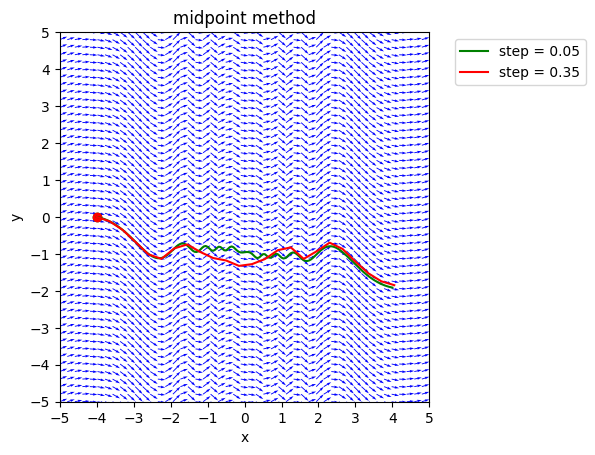

In [3]:
# midpoint AKA RK2
# step and initial conditions
totaltime = 8
dt1, dt2 = 0.05, 0.35
x1, y1 = np.array([-4.0]), np.array([0.0])
x2, y2 = np.array([-4.0]), np.array([0.0])

# update rule
def midpoint_update(x, y, dt):
    vx, vy = vel1(x[-1], y[-1])
    vx, vy = vel1(x[-1] + 0.5*vx*dt, y[-1] + 0.5*vy*dt) # get velocity at midpoint
    newx, newy = x[-1] + vx*dt, y[-1] + vy*dt
    return np.append(x, newx), np.append(y, newy)

# create tajectory; should take `totaltime` seconds
for i in range(0, round(totaltime/dt1)):
    x1, y1 = midpoint_update(x1, y1, dt1)
    
for i in range(0, round(totaltime/dt2)):
    x2, y2 = midpoint_update(x2, y2, dt2)

# plot trajectory with quiver
plt.quiver(X, Y, Vx, Vy, units='xy', scale=5, color='blue')
plt.xlim(-5, 5), plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 6, 1)), plt.yticks(np.arange(-5, 6, 1))
plt.xlabel("x"), plt.ylabel("y")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(x1, y1, color='green', label="step = {}".format(dt1))
plt.plot(x2, y2, color='red', label="step = {}".format(dt2))
plt.scatter([x1[0]], [y1[0]], color='green')
plt.scatter([x2[0]], [y2[0]], color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("midpoint method")
plt.show()

## Method 3: Runge-Kutta 4th-Order (RK4)

Can we do better? We can improve upon the midpoint method to obtain the RK4 method, which is considered to have the best balance between computational cost and accuracy. Of course, it gets a bit tricky.

<img src="rk4_img.png" alt="Drawing" style="width: 800px;"/>

We take
\begin{align*}
    \vec{k}_{1} &= \vec{v}(\vec{x}_{n}), \\
    \vec{k}_{2} &= \vec{v}(\vec{x}_{n} + \tfrac{\Delta t}{2}\vec{k}_{1}), \\
    \vec{k}_{3} &= \vec{v}(\vec{x}_{n} + \tfrac{\Delta t}{2}\vec{k}_{2}), \\
    \vec{k}_{4} &= \vec{v}(\vec{x}_{n} + \Delta t \vec{k}_{3}),
\end{align*}
and then set
\begin{gather}
    \boxed{ \vec{x}_{n+1} = \vec{x}_{n} + \frac{1}{6}\Delta t (\vec{k}_{1} + 2\vec{k}_{2} + 2\vec{k}_{3} + \vec{k}_{4}) }
\end{gather}
with initial conditions $\vec{x}_{0} = \vec{x}(0)$.

The local error here is $O(\Delta t^{5})$. See https://math.stackexchange.com/questions/2636121/.

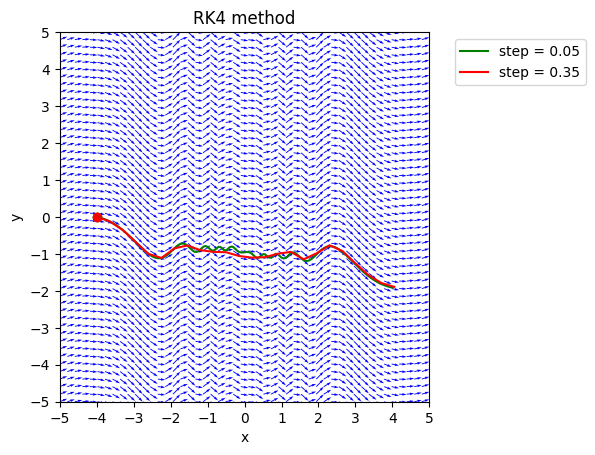

In [4]:
# RK4
# step and initial conditions
totaltime = 8
dt1, dt2 = 0.05, 0.35
x1, y1 = np.array([-4.0]), np.array([0.0])
x2, y2 = np.array([-4.0]), np.array([0.0])

# update rule
def RK4_update(x, y, dt):
    kx1, ky1 = vel1(x[-1], y[-1])
    kx2, ky2 = vel1(x[-1] + 0.5*dt*kx1, y[-1] + 0.5*dt*ky1)
    kx3, ky3 = vel1(x[-1] + 0.5*dt*kx2, y[-1] + 0.5*dt*ky2)
    kx4, ky4 = vel1(x[-1] + dt*kx3, y[-1] + dt*ky3)
    newx, newy = x[-1] + (dt/6)*(kx1 + 2*kx2 + 2*kx3 + kx4), y[-1] + (dt/6)*(ky1 + 2*ky2 + 2*ky3 + ky4)
    return np.append(x, newx), np.append(y, newy)

# create tajectory; should take `totaltime` seconds
for i in range(0, round(totaltime/dt1)):
    x1, y1 = RK4_update(x1, y1, dt1)
    
for i in range(0, round(totaltime/dt2)):
    x2, y2 = RK4_update(x2, y2, dt2)

# plot trajectory with quiver
plt.quiver(X, Y, Vx, Vy, units='xy', scale=5, color='blue')
plt.xlim(-5, 5), plt.ylim(-5, 5)
plt.xticks(np.arange(-5, 6, 1)), plt.yticks(np.arange(-5, 6, 1))
plt.xlabel("x"), plt.ylabel("y")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.plot(x1, y1, color='green', label="step = {}".format(dt1))
plt.plot(x2, y2, color='red', label="step = {}".format(dt2))
plt.scatter([x1[0]], [y1[0]], color='green')
plt.scatter([x2[0]], [y2[0]], color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("RK4 method")
plt.show()